In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('US_Accidents.csv')

C:\Users\Home\AppData\Local\Temp\ipykernel_19224\131546090.py:1: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('US_Accidents.csv')


In [36]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [37]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286780 entries, 0 to 2286779
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [39]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2286780
End_Lng                  2286780
Distance(mi)                   0
Description                    5
Street                      1713
City                          53
County                         1
State                          1
Zipcode                      347
Country                        1
Timezone                    1692
Airport_Code                4193
Weather_Timestamp          24909
Temperature(F)             35948
Wind_Chill(F)             551589
Humidity(%)                38966
Pressure(in)               29465
Visibility(mi)             40514
Wind_Direction             39198
Wind_Speed(mph)           142926
Precipitation(in)         604898
Weather_Condition          39249
Amenity                        1
Bump      

In [40]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [41]:
Missing_percentages = df.isnull().sum().sort_values(ascending = False)/ len(df)
Missing_percentages

End_Lat                  1.000000e+00
End_Lng                  1.000000e+00
Precipitation(in)        2.645195e-01
Wind_Chill(F)            2.412077e-01
Wind_Speed(mph)          6.250098e-02
Visibility(mi)           1.771661e-02
Weather_Condition        1.716344e-02
Wind_Direction           1.714113e-02
Humidity(%)              1.703968e-02
Temperature(F)           1.571992e-02
Pressure(in)             1.288493e-02
Weather_Timestamp        1.089261e-02
Airport_Code             1.833583e-03
Street                   7.490882e-04
Timezone                 7.399050e-04
Sunrise_Sunset           7.280980e-04
Civil_Twilight           7.280980e-04
Nautical_Twilight        7.280980e-04
Astronomical_Twilight    7.280980e-04
Zipcode                  1.517418e-04
City                     2.317669e-05
Description              2.186481e-06
Country                  4.372961e-07
Turning_Loop             4.372961e-07
Traffic_Signal           4.372961e-07
Traffic_Calming          4.372961e-07
Stop        

<Axes: >

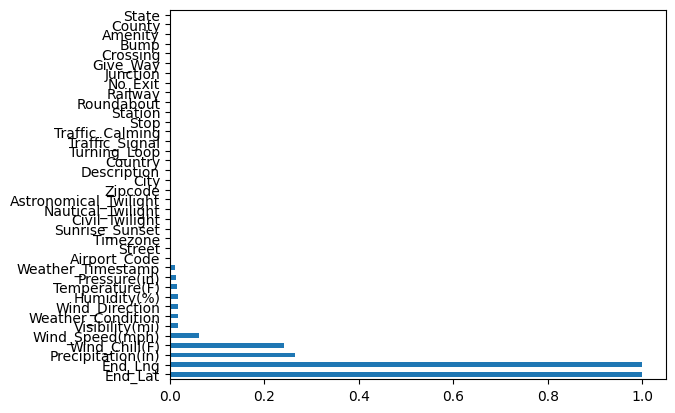

In [42]:
Missing_percentages[Missing_percentages !=0].plot(kind = 'barh')

In [43]:
cities = df['City'].unique()
len(cities)

10542

In [44]:
cities_by_accident= df['City'].value_counts()
cities_by_accident

City
Houston         76161
Dallas          53871
Charlotte       49646
Los Angeles     45613
Austin          45531
                ...  
West Harwich        1
Leupp               1
Crisfield           1
East Troy           1
Economy             1
Name: count, Length: 10541, dtype: int64

<Axes: ylabel='City'>

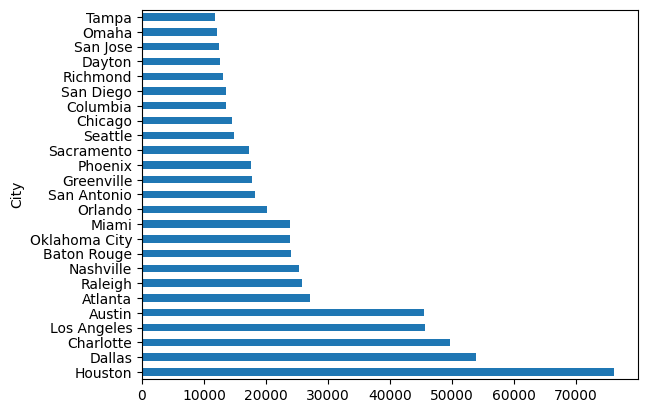

In [50]:
cities_by_accident[:25].plot(kind =  'barh')

In [51]:
High_accident_cities = cities_by_accident[cities_by_accident >= 1000]
Low_accident_cities = cities_by_accident[cities_by_accident < 1000]

<Axes: xlabel='count', ylabel='Count'>

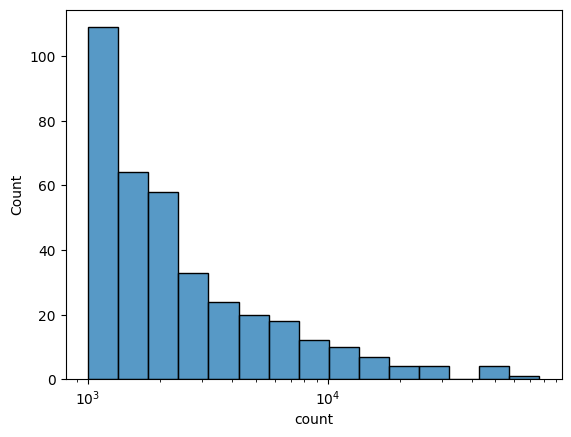

In [52]:
sns.histplot(High_accident_cities, log_scale = True)

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],errors='coerce')